# PSD->Acorr Padding Testing

Testing to see if padding PSD with more zeros will reduce any smudging in images with information near the edges

Conclusion: This does not help. I think I have to add the padding before I preprocess the data in the first place, which would increase the amount of FFT calculations beyond what I'd like. Besides, most of the binary stars should be centered

In [1]:
# Included modules
import sys
from labeyrieClasses import target,deconvolved, photometry, camsky
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

In [2]:
# Instantiate objects
binary = target()
reference = target()
deconv512 = deconvolved()
deconv1024 = deconvolved()

In [3]:
# Prompt user for binary PSD file location
binary.psd.fileName = "/home/niels/Documents/FITS/KP334_PSD.fits"
# Import binary star PSD FITS
binary.psd.read()

# Prompt user for reference PSD file location
reference.psd.fileName = "/home/niels/Documents/FITS/KP335_PSD.fits"
# Import reference star PSD FITS
reference.psd.read()

# Deconvolve reference and binary stars
deconv512.psdDeconvolve(binary.psd.data,reference.psd.data,1e-12)

# Perform filtering on output star object
deconv512.psdFilter(lpfRadius = 20, interference=True)

# Get autocorrelogram
deconv512.acorrCalc()

Filename: /home/niels/Documents/FITS/KP334_PSD.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (512, 512)   float64   
None
Filename: /home/niels/Documents/FITS/KP335_PSD.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (512, 512)   float64   
None


In [4]:
deconv1024.psdFiltered.data = np.zeros((1024,1024))

for row in np.arange(512):
    for column in np.arange(512):
        deconv1024.psdFiltered.data[256+row,256+column] = deconv512.psdFiltered.data[row,column]
        
deconv1024.acorrCalc()

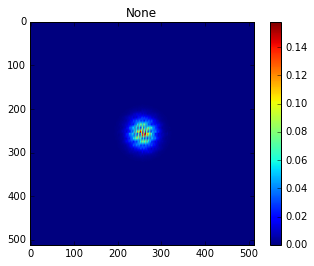

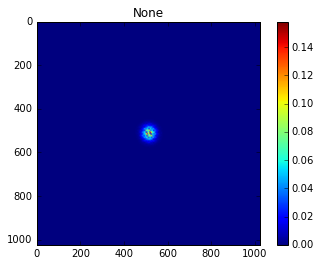

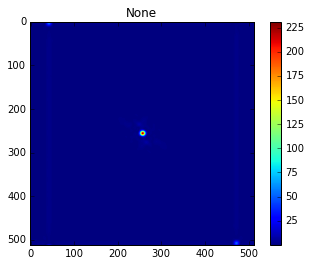

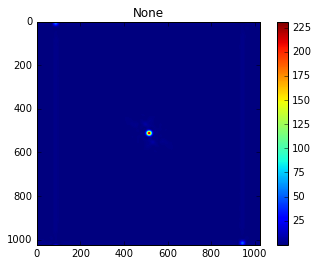

In [5]:
deconv512.psdFiltered.view()
deconv1024.psdFiltered.view()

deconv512.acorr.view()
deconv1024.acorr.view()